In [34]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import altair as alt
from vega_datasets import data

In [35]:
#upload data to PANDAS

#from google.colab import files
#data = files.upload()
fertility_df = pd.read_excel("fertility.xlsx")

fertility_df

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,2022-04-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.000,1961.000,1962.000,1963.000,1964.000,1965.000,...,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000,2020.000,2021.0
4,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.795,1.813,1.834,1.854,1.872,1.886,1.896,1.901,1.901,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Kosovo,XKX,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.190,2.160,2.130,2.090,2.060,2.020,2.000,1.970,1.950,NaN
266,"Yemen, Rep.",YEM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.938,7.962,7.991,8.026,8.067,8.114,...,4.439,4.326,4.214,4.103,3.994,3.890,3.792,3.700,3.614,NaN
267,South Africa,ZAF,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.041,6.028,6.010,5.986,5.956,5.920,...,2.561,2.537,2.511,2.484,2.457,2.430,2.405,2.381,2.358,NaN
268,Zambia,ZMB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.115,7.169,7.214,7.249,7.274,7.291,...,5.233,5.132,5.026,4.918,4.814,4.718,4.633,4.559,4.496,NaN


In [36]:
#Remove Unnecessary Data, first 3 rows provide no data 
fertility_df.drop(fertility_df.index[0:3],0,inplace=True)

#Remove Unnecessary Columns 
fertility_df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 65'],axis=1,inplace = True)

In [37]:
#replace the Column Index with year in accordance to fertility stat EXCEPT country code and country name 

col_index=list(fertility_df.columns)
fertility_df.rename(columns={col_index[x]: (1960-2)+ int(x) for x in range(len(col_index))} , inplace=True)

col_index
#replace the 2 temporary column index with Country Name and Country Code
fertility_df.rename(columns={1958:'Country', 1959:'Code'}, inplace=True)

#Remove 1st row since now the Indexes are redefined 
fertility_df.drop(labels=3, axis=0, inplace=True)

#Alphabetically order data 
fertility_df.sort_values(by='Country', inplace=True)


#reset index
fertility_df.reset_index(drop=True,inplace=True)


In [38]:
#Remove Null Data 
fertility_df.dropna(inplace=True)


#assign variable to condense data
dec_1=fertility_df.loc[:,1960:1969]
dec_2=fertility_df.loc[:,1970:1979]
dec_3=fertility_df.loc[:,1980:1989]
dec_4=fertility_df.loc[:,1990:1999]
dec_5=fertility_df.loc[:,2000:2009]
dec_6=fertility_df.loc[:,2010:2020]

#Condense Data per year to per decade
fertility_df['1960-69']=dec_1.mean(axis=1)
fertility_df['1970-79']=dec_2.mean(axis=1)
fertility_df['1980-89']=dec_3.mean(axis=1)
fertility_df['1990-99']=dec_4.mean(axis=1)
fertility_df['2000-09']=dec_5.mean(axis=1)
fertility_df['2010-20']=dec_6.mean(axis=1)

#Discard per year data 
year_60=fertility_df.loc[:,1960:2020]
fertility_df.drop(year_60, axis=1, inplace=True)

#Add percentage change column
#fertility_df.set_index('Country',inplace=True)

fertility_df#fertility_df.to_excel('Fertility_Data', index=False).to_excel('Fertility_Data', index=False)

,Country,Code,1960-69,1970-79,1980-89,1990-99,2000-09,2010-20
0,Afghanistan,AFG,7.450000,7.449700,7.455600,7.559200,6.901300,5.019091
1,Africa Eastern and Southern,AFE,6.773259,6.784739,6.550031,5.910167,5.339794,4.650904
2,Africa Western and Central,AFW,6.517633,6.781353,6.748698,6.287789,5.845308,5.307912
3,Albania,ALB,5.828800,4.307500,3.311300,2.623500,1.836000,1.651182
4,Algeria,DZA,7.636700,7.400100,5.914300,3.616700,2.543900,2.984182
...,...,...,...,...,...,...,...,...
260,Virgin Islands (U.S.),VIR,5.600000,4.186900,3.007300,2.540000,2.200000,2.100909
262,World,WLD,4.989437,4.243728,3.537029,2.930788,2.606188,2.452050
263,"Yemen, Rep.",YEM,8.109800,8.536800,8.799000,7.619400,5.528500,4.118182
264,Zambia,ZMB,7.261400,7.325000,6.785700,6.228500,5.801400,4.933818


In [39]:
#add additional columns 

#Measuring Parameter
dec_range = fertility_df.loc[:,'1960-69':'2010-20']

#Average birth per woman 
fertility_df['Average Birth']=dec_range.mean(axis=1)

dec_range.pct_change()

#Percentage change from 1960s-2020s
fertility_df['Change Over Time']= ((fertility_df['2010-20']-fertility_df['1960-69'])/fertility_df['1960-69'])*100 
 
fertility_df



,Country,Code,1960-69,1970-79,1980-89,1990-99,2000-09,2010-20,Average Birth,Change Over Time
0,Afghanistan,AFG,7.450000,7.449700,7.455600,7.559200,6.901300,5.019091,6.972482,-32.629652
1,Africa Eastern and Southern,AFE,6.773259,6.784739,6.550031,5.910167,5.339794,4.650904,6.001482,-31.334324
2,Africa Western and Central,AFW,6.517633,6.781353,6.748698,6.287789,5.845308,5.307912,6.248116,-18.560739
3,Albania,ALB,5.828800,4.307500,3.311300,2.623500,1.836000,1.651182,3.259714,-71.672011
4,Algeria,DZA,7.636700,7.400100,5.914300,3.616700,2.543900,2.984182,5.015980,-60.923150
...,...,...,...,...,...,...,...,...,...,...
260,Virgin Islands (U.S.),VIR,5.600000,4.186900,3.007300,2.540000,2.200000,2.100909,3.272518,-62.483766
262,World,WLD,4.989437,4.243728,3.537029,2.930788,2.606188,2.452050,3.459870,-50.855166
263,"Yemen, Rep.",YEM,8.109800,8.536800,8.799000,7.619400,5.528500,4.118182,7.118614,-49.219687
264,Zambia,ZMB,7.261400,7.325000,6.785700,6.228500,5.801400,4.933818,6.389303,-32.054174


In [40]:
#further segment data for analysis


#remove IDA and IBRD since data dosesnt elaborate on these funded countries 

IDA_IBRD=(fertility_df[fertility_df.Country.str.contains('IDA|IBRD')])

#create income series  

income=fertility_df[fertility_df.Country.str.contains('income') &~ fertility_df.Country.str.contains('excluding')]

# create exlcuding series 
excluding=fertility_df[fertility_df.Country.str.contains('excluding')]

excluding 

region=fertility_df[fertility_df.Country.str.contains('South Asia|Africa Eastern and Southern|Africa Western and Central|East Asia & Pacific|Europe & Central Asia|Latin America & Caribbean|Middle East & North Africa|Sub-Saharan Africa') 
                    &~ fertility_df.Country.str.contains('excluding')
                    &~ fertility_df.Country.str.contains('IDA|IBRD')]



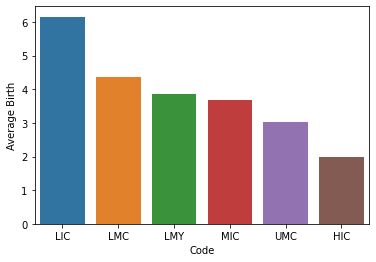

In [41]:
income=income.sort_values(by='Average Birth', ascending=False)

income

income_ax= sns.barplot(x="Code", y="Average Birth", data=income)

In [42]:
income

,Country,Code,1960-69,1970-79,1980-89,1990-99,2000-09,2010-20,Average Birth,Change Over Time
144,Low income,LIC,6.624607,6.725601,6.640661,6.304133,5.734000,4.899844,6.154808,-26.035704
145,Lower middle income,LMC,5.940663,5.542369,4.833970,3.890453,3.224954,2.802469,4.372480,-52.825658
143,Low & middle income,LMY,5.723403,4.872397,3.978777,3.200131,2.783989,2.592454,3.858525,-54.704331
162,Middle income,MIC,5.662068,4.748167,3.802703,2.984285,2.554760,2.372512,3.687416,-58.098143
254,Upper middle income,UMC,5.411133,4.035814,2.868813,2.110341,1.835554,1.834946,3.016100,-66.089421
101,High income,HIC,2.832089,2.184848,1.865578,1.747038,1.694451,1.638557,1.993760,-42.143149


In [43]:
income_df=income.sort_values(by='Change Over Time',ascending=False)

income_df

,Country,Code,1960-69,1970-79,1980-89,1990-99,2000-09,2010-20,Average Birth,Change Over Time
144,Low income,LIC,6.624607,6.725601,6.640661,6.304133,5.734000,4.899844,6.154808,-26.035704
101,High income,HIC,2.832089,2.184848,1.865578,1.747038,1.694451,1.638557,1.993760,-42.143149
145,Lower middle income,LMC,5.940663,5.542369,4.833970,3.890453,3.224954,2.802469,4.372480,-52.825658
143,Low & middle income,LMY,5.723403,4.872397,3.978777,3.200131,2.783989,2.592454,3.858525,-54.704331
162,Middle income,MIC,5.662068,4.748167,3.802703,2.984285,2.554760,2.372512,3.687416,-58.098143
254,Upper middle income,UMC,5.411133,4.035814,2.868813,2.110341,1.835554,1.834946,3.016100,-66.089421


In [44]:
#Top 10 best Country Average Birth rates per woman for 60 years 

Average_Birth_rank=fertility_df.sort_values(by='Average Birth',ascending=False).head(10)

# Top 10 best Countries Growth Rates per woman for 60 years 
Top_10_Change=fertility_df.sort_values(by='Change Over Time',ascending=False).head(10)

Average_Birth_rank

,Country,Code,1960-69,1970-79,1980-89,1990-99,2000-09,2010-20,Average Birth,Change Over Time
177,Niger,NER,7.5159,7.6693,7.8483,7.7297,7.6107,7.142364,7.586044,-4.969949
218,Somalia,SOM,7.2483,7.0649,7.1495,7.5921,7.3247,6.368182,7.124614,-12.142408
263,"Yemen, Rep.",YEM,8.1098,8.5368,8.7990,7.6194,5.5285,4.118182,7.118614,-49.219687
0,Afghanistan,AFG,7.4500,7.4497,7.4556,7.5592,6.9013,5.019091,6.972482,-32.629652
34,Burundi,BDI,7.1152,7.3225,7.4212,7.2033,6.6147,5.701909,6.896468,-19.862982
152,Mali,MLI,7.0417,7.1489,7.1535,7.0620,6.7854,6.135273,6.887795,-12.872279
7,Angola,AGO,7.0657,7.4769,7.4296,6.9646,6.4671,5.778364,6.863711,-18.219516
43,Chad,TCD,6.3423,6.7444,7.1114,7.3909,7.0765,6.059364,6.787477,-4.461100
203,Rwanda,RWA,8.1995,8.3520,8.1116,6.3394,5.1653,4.184545,6.725391,-48.965846
249,Uganda,UGA,7.0744,7.1032,7.1012,7.0159,6.5949,5.399818,6.714903,-23.671008


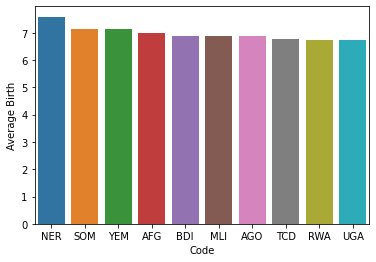

In [53]:
ax = sns.barplot(x="Code", y="Average Birth", data=Average_Birth_rank)

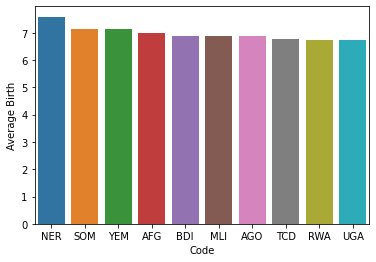

In [54]:
#Top 10 Worst Country Average Birth rates per woman for 60 years

Least_10_Birth_Country=fertility_df.sort_values(by='Average Birth',ascending=False).head(10)
Least_10_Birth_Country

ax = sns.barplot(x="Code", y="Average Birth", data=Least_10_Birth_Country)

In [55]:
Least_10_Birth_Country


,Country,Code,1960-69,1970-79,1980-89,1990-99,2000-09,2010-20,Average Birth,Change Over Time
177,Niger,NER,7.5159,7.6693,7.8483,7.7297,7.6107,7.142364,7.586044,-4.969949
218,Somalia,SOM,7.2483,7.0649,7.1495,7.5921,7.3247,6.368182,7.124614,-12.142408
263,"Yemen, Rep.",YEM,8.1098,8.5368,8.7990,7.6194,5.5285,4.118182,7.118614,-49.219687
0,Afghanistan,AFG,7.4500,7.4497,7.4556,7.5592,6.9013,5.019091,6.972482,-32.629652
34,Burundi,BDI,7.1152,7.3225,7.4212,7.2033,6.6147,5.701909,6.896468,-19.862982
152,Mali,MLI,7.0417,7.1489,7.1535,7.0620,6.7854,6.135273,6.887795,-12.872279
7,Angola,AGO,7.0657,7.4769,7.4296,6.9646,6.4671,5.778364,6.863711,-18.219516
43,Chad,TCD,6.3423,6.7444,7.1114,7.3909,7.0765,6.059364,6.787477,-4.461100
203,Rwanda,RWA,8.1995,8.3520,8.1116,6.3394,5.1653,4.184545,6.725391,-48.965846
249,Uganda,UGA,7.0744,7.1032,7.1012,7.0159,6.5949,5.399818,6.714903,-23.671008


In [56]:
#years = fertility_df.drop(['Country','Average Birth', 'Code','Change Over Time'], axis = 1)
#years

(1.0, 7.0)

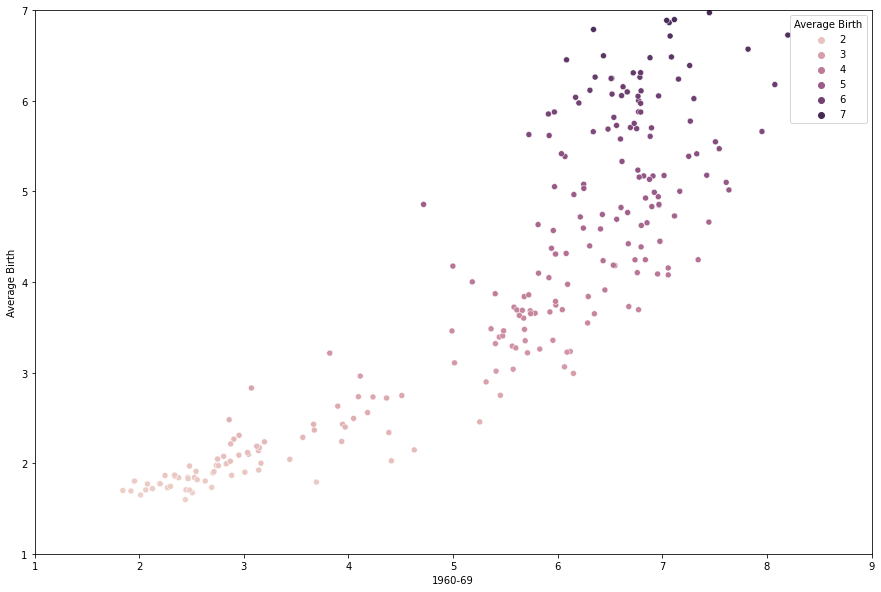

In [57]:
# Scatterplot of Average Birth Rate in Country.
plt.figure(figsize=(15,10))
avg_birth = sns.scatterplot(x='1960-69', y='Average Birth', hue='Average Birth', data=fertility_df)
avg_birth.set_xlim([1.0, 9.0])
avg_birth.set_ylim([1.0,7.0])

In [58]:
line = alt.Chart(Average_Birth_rank).mark_line().encode(
    x='Country',
    y='Average Birth'
)

band = alt.Chart(Average_Birth_rank).mark_errorband(extent='ci').encode(
    x='Country',
    y=alt.Y('Average Birth', title='Average Birth '),
)

(band + line).properties(height=600, width= 800)

alt.LayerChart(...)

In [62]:
line = alt.Chart(Least_10_Birth_Country).mark_line().encode(
    x='Country',
    y='Average Birth'
)

band = alt.Chart(Average_Birth_rank).mark_errorband(extent='ci').encode(
    x='Country',
    y=alt.Y('Average Birth', title='Average Birth '),
)

(band + line).properties(height=600, width= 800)

alt.LayerChart(...)

<AxesSubplot:title={'center':"First listed country's Fertility Rate"}, xlabel='Country'>

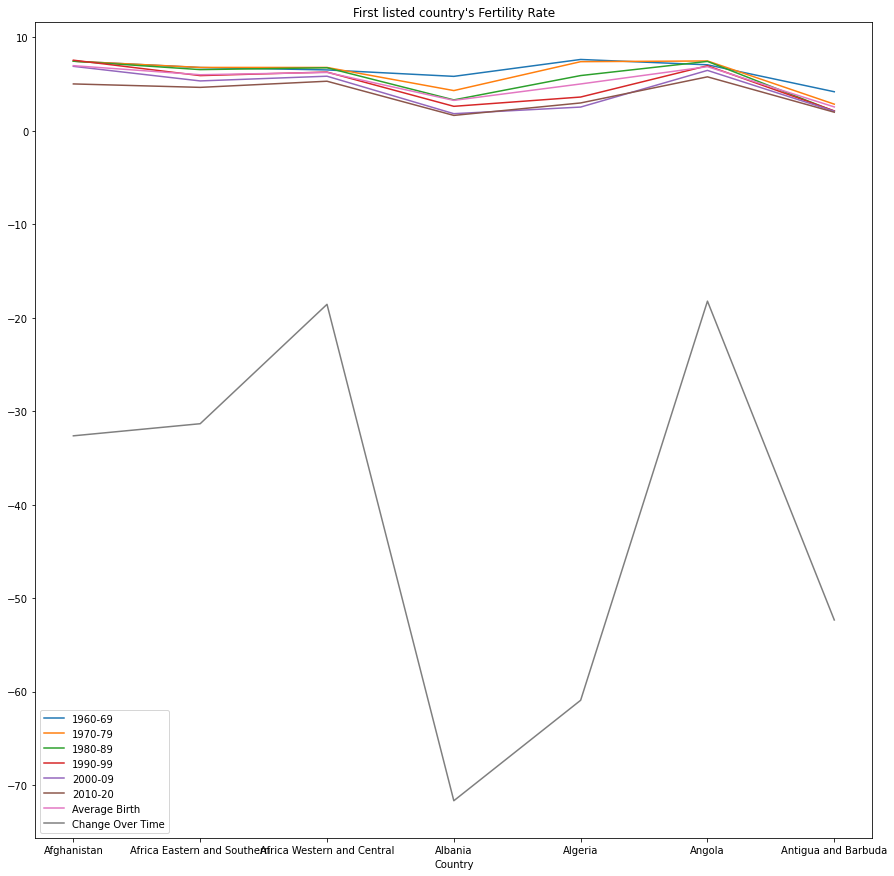

In [60]:
# First seven listed country's line chart.
first_listed_country_df= fertility_df.drop(fertility_df.index[7:] )
first_listed_country_df.plot.line(x="Country", title="First listed country's Fertility Rate", figsize= (15,15)) 

<AxesSubplot:title={'center':"Last listed Conutry's Fertility Rate"}, xlabel='Country'>

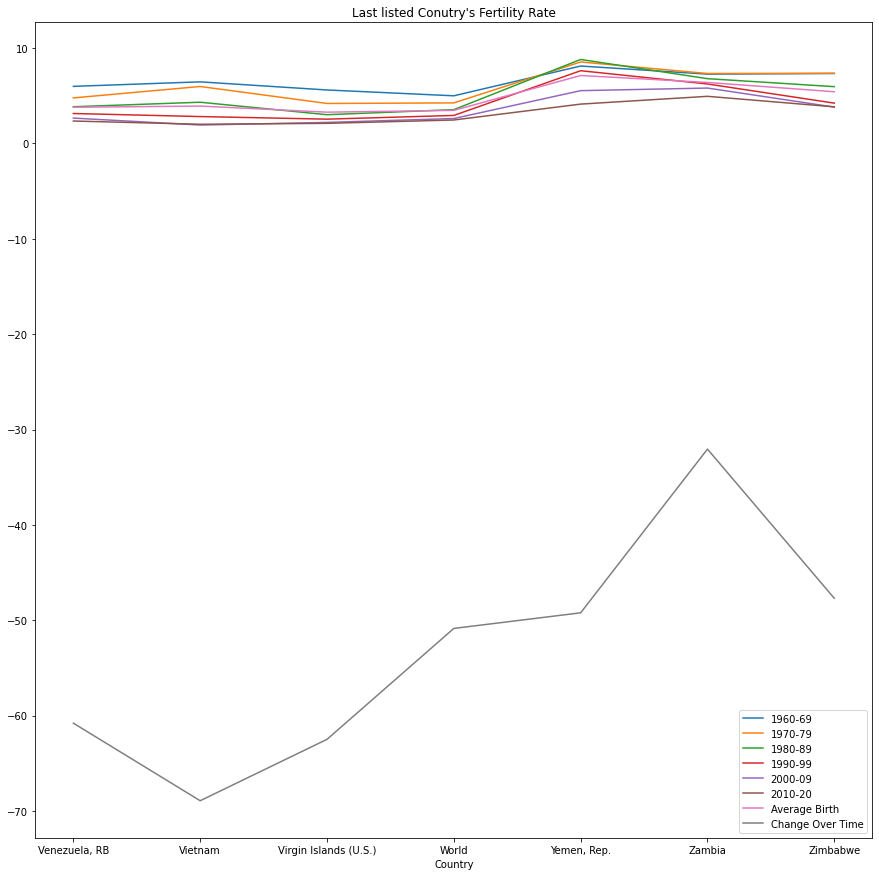

In [61]:
# Last seven listed country's line chart.
last_listed_country_df = fertility_df.drop(fertility_df.index[:230])
last_listed_country_df.plot.line(x="Country", title="Last listed Conutry's Fertility Rate", figsize= (15,15))

In [63]:
new_df = fertility_df.drop(fertility_df.index[19:])
new_df

,Country,Code,1960-69,1970-79,1980-89,1990-99,2000-09,2010-20,Average Birth,Change Over Time
0,Afghanistan,AFG,7.450000,7.449700,7.455600,7.559200,6.901300,5.019091,6.972482,-32.629652
1,Africa Eastern and Southern,AFE,6.773259,6.784739,6.550031,5.910167,5.339794,4.650904,6.001482,-31.334324
2,Africa Western and Central,AFW,6.517633,6.781353,6.748698,6.287789,5.845308,5.307912,6.248116,-18.560739
3,Albania,ALB,5.828800,4.307500,3.311300,2.623500,1.836000,1.651182,3.259714,-71.672011
4,Algeria,DZA,7.636700,7.400100,5.914300,3.616700,2.543900,2.984182,5.015980,-60.923150
7,Angola,AGO,7.065700,7.476900,7.429600,6.964600,6.467100,5.778364,6.863711,-18.219516
8,Antigua and Barbuda,ATG,4.182900,2.853900,2.089400,2.137400,2.094800,1.993909,2.558718,-52.331897
9,Arab World,ARB,7.016394,6.673746,5.883719,4.539404,3.598937,3.340432,5.175439,-52.391041
10,Argentina,ARG,3.072300,3.248300,3.133300,2.794600,2.435300,2.295727,2.829921,-25.276592
11,Armenia,ARM,4.049300,2.844400,2.546500,2.116200,1.671900,1.739636,2.494656,-57.038590


In [64]:
# Bar Chart with Labels.
bars = alt.Chart(new_df).mark_bar().encode(
    x='Country',
    y="1960-69"
)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dx=3  
).encode(
    text='1960-69'
)

(bars + text).properties(height=600, width= 800)

alt.LayerChart(...)

In [65]:
bars = alt.Chart(new_df).mark_bar().encode(
    x='Country',
    y="2010-20"
)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dx=3  
).encode(
    text='2010-20'
)

(bars + text).properties(height=600, width= 800)

alt.LayerChart(...)

In [66]:
# Line chart showing Average Brith Rate in following first 20 countries from list.
line = alt.Chart(new_df).mark_line().encode(
    x='Country',
    y='Average Birth'
)

band = alt.Chart(new_df).mark_errorband(extent='ci').encode(
    x='Country',
    y=alt.Y('Average Birth', title='Average Birth Rate'),
)

(band + line).properties(height=600, width= 800)

alt.LayerChart(...)

In [67]:
# Scatter Plot for 2010-20 with its Average Birth Rate.
alt.Chart(fertility_df).mark_circle(
    color='red',
    opacity=0.3
).encode(
    x='2010-20',
    y='Average Birth'
).properties(height=600, width= 800)

alt.Chart(...)

In [68]:
# Scatter Plot form first 20 countries
alt.Chart(new_df).mark_point().encode(
    x='Country',
    y='Average Birth',
    color=alt.Color('Average Birth', bin=alt.Bin(maxbins=5))
)


alt.Chart(...)

In [69]:
# Bar Chart with Line on Dual Axis.
# Country with years 2010-20.
base = alt.Chart(income).encode(x='Country')

bar = base.mark_bar().encode(y='1960-69')

line =  base.mark_line(color='red').encode(
    y='Average Birth'
)

(bar + line).properties(width=600, height=500)

alt.LayerChart(...)

In [70]:
# Bar Chart with Line on Dual Axis.
# Country with years 2010-20.
base = alt.Chart(income).encode(x='Country')

bar = base.mark_bar().encode(y='2010-20')

line =  base.mark_line(color='red').encode(
    y='Average Birth'
)

(bar + line).properties(width=600, height=500)

alt.LayerChart(...)

In [71]:
base = alt.Chart(region).encode(x='Country')

bar = base.mark_bar().encode(y='1960-69')

line =  base.mark_bar(color='red').encode(
    y='2010-20'
)

(bar + line).properties(width=600, height = 500)

alt.LayerChart(...)

In [72]:
alt.Chart(region).mark_circle().encode(
    alt.X('2010-20', bin=True),
    alt.Y('Average Birth', bin=True),
    size='count()'
)

alt.Chart(...)